#Zuraiz Zahoor Ajaz
#####The Spark Foundation - Data Science and Business Analytics Internship
#####As a business manager, try to find out the weak areas where you can work to make more profit.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsg
import io
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


#**Loading and displaying dataset**


In [91]:
data = pd.read_csv('SampleSuperstore.csv')
print(data.shape)
data.head(10) #displaying 10 rows


(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [92]:
print(data["City"].nunique()) # number of unique cities
print(data["Category"].unique()) #number of unique categories

531
['Furniture' 'Office Supplies' 'Technology']


#**Finding most sold categories**


In [93]:
print('Most sold main category =',data["Category"].value_counts().idxmax()) # Most sold main category
print('Most sold sub category  =',data["Sub-Category"].value_counts().idxmax()) # Most sold main category

Most sold main category = Office Supplies
Most sold sub category  = Binders


#**Visualisation of categories**


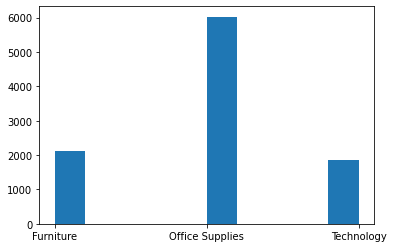

In [94]:
plt.hist(data["Category"])
plt.show()

([<matplotlib.patches.Wedge object at 0x7f4dfaf68450>, <matplotlib.patches.Wedge object at 0x7f4dfaf68d10>, <matplotlib.patches.Wedge object at 0x7f4dfaef55d0>], [Text(-0.3496380660429372, 1.0429540846910543, 'Office Supplies'), Text(-0.27974354545119656, -1.0638343615330323, 'Furniture'), Text(0.9197467277963864, -0.6033787837733774, 'Technology')], [Text(-0.1907116723870566, 0.5688840461951205, '60.3%'), Text(-0.15258738842792538, -0.5802732881089266, '21.2%'), Text(0.5016800333434834, -0.32911570024002396, '18.5%')])


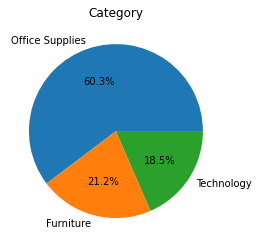

In [95]:
plt.title('Category')
print(plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f4dfaea2210>, <matplotlib.patches.Wedge object at 0x7f4dfaea2910>, <matplotlib.patches.Wedge object at 0x7f4dfae9e1d0>, <matplotlib.patches.Wedge object at 0x7f4dfae9e9d0>, <matplotlib.patches.Wedge object at 0x7f4dfaeae410>, <matplotlib.patches.Wedge object at 0x7f4dfaeaec90>, <matplotlib.patches.Wedge object at 0x7f4dfaeb1e90>, <matplotlib.patches.Wedge object at 0x7f4dfaeb1f90>, <matplotlib.patches.Wedge object at 0x7f4dfaeae090>, <matplotlib.patches.Wedge object at 0x7f4dfaeae190>, <matplotlib.patches.Wedge object at 0x7f4dfaece510>, <matplotlib.patches.Wedge object at 0x7f4dfb150090>, <matplotlib.patches.Wedge object at 0x7f4dfb150810>, <matplotlib.patches.Wedge object at 0x7f4dfb15e710>, <matplotlib.patches.Wedge object at 0x7f4dfb15e7d0>, <matplotlib.patches.Wedge object at 0x7f4dfb16a6d0>, <matplotlib.patches.Wedge object at 0x7f4dfb16a790>], [Text(0.9763276824947603, 0.5067388443709547, 'Binders'), Text(0.19978472989163298, 1.0817051639

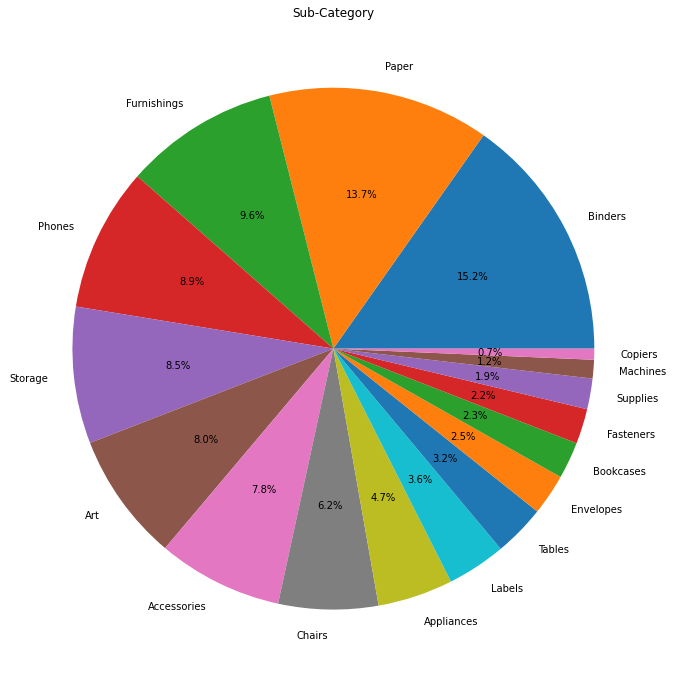

In [96]:
plt.figure(figsize = (12,12))
plt.title('Sub-Category')
print(plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index,autopct='%1.1f%%'))

#**Visualizing profits**


<function matplotlib.pyplot.show>

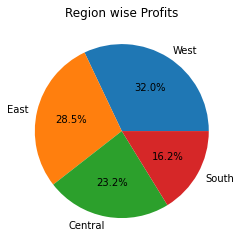

In [97]:
plt.title("Region wise Profits")
plt.pie(data["Region"].value_counts(),labels=data["Region"].value_counts().index,autopct='%1.1f%%')
plt.show

#**Highest profits and highest losses**


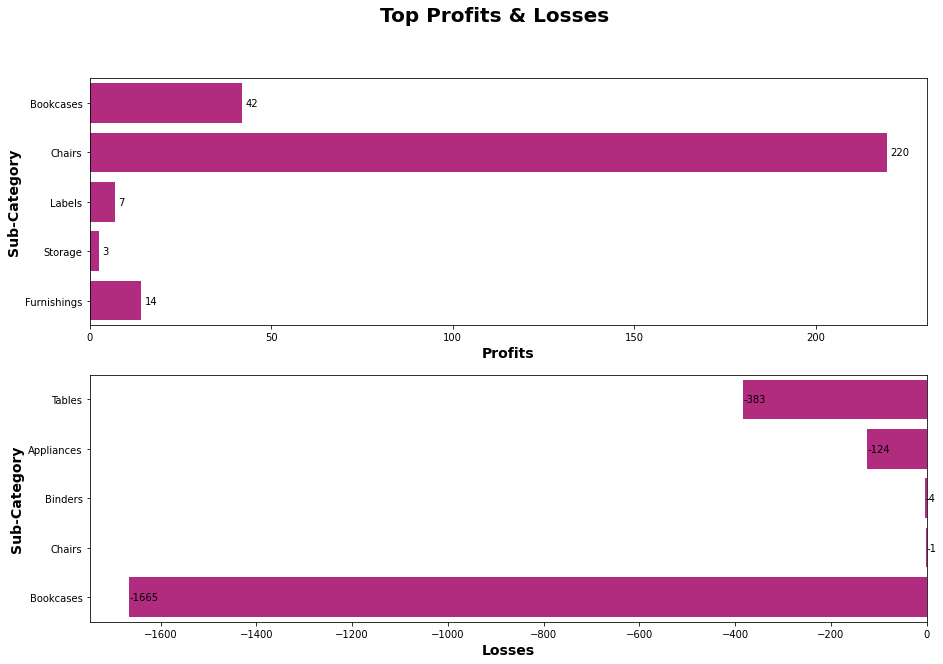

In [98]:
fig, axes = plt.subplots(2, figsize=(15, 10), sharey=False)
fig.suptitle('Top Profits & Losses',weight='bold',fontsize=20)

#Position [0,0]
sns.barplot(ax=axes[0], y= data['Sub-Category'][data['Profit']>1].head(5),
            x=data.Profit, orient='h', 
            color='mediumvioletred')
axes[0].set_ylabel('Sub-Category',weight='bold',fontsize=14)
axes[0].set_xlabel('Profits\n\n', weight='bold',fontsize=14)


for p in axes[0].patches:
    width = p.get_width()    
    axes[0].text(width + 1,     
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center') 
sns.barplot(ax=axes[1], y= data['Sub-Category'][data['Profit']<0].head(5),
            x=data.Profit, orient='h', 
            color='mediumvioletred')
axes[1].set_ylabel('Sub-Category',weight='bold',fontsize=14)
axes[1].set_xlabel('Losses', weight='bold',fontsize=14)

for p in axes[1].patches:
    width = p.get_width()    
    axes[1].text(width + 1,     
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center') 

#**Top Cities**


<function matplotlib.pyplot.show>

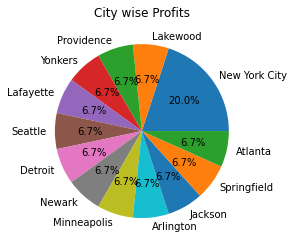

In [103]:
plt.title("City wise Profits")
plt.pie((data["City"][data['Profit']>2000]).value_counts(),labels=data["City"][data['Profit']>2000].value_counts().index,autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

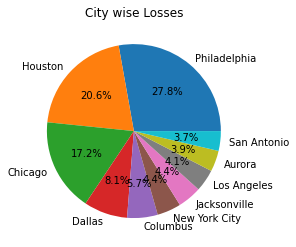

In [100]:
gplt.title("City wise Losses")
plt.pie((data["City"][data['Profit']<0]).value_counts().head(10),labels=(data["City"][data['Profit']<0]).value_counts().head(10).index,autopct='%1.1f%%')
plt.show

##**Conclusion**


#####**From business point of view, it is important to note which categories and sub-categories profited the most. Also which sub-categories had most losses. Also cities which were most profitable and cities which were least profitable. This helps in identifying strength and weeknesses of the business. Company should increase sales volume of the most sold categories and minimize the least sold categories. Also company should maximise sales volume of the most profitable sub-categories in cities where company was most successful and minimize sales volume in cities which proved to be least profitable.**